In [1]:
import tensorflow as tf
import os


In [2]:
gpus=tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[]

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPUS')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
import cv2
import imghdr
data_dir='data'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14312\806088369.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [10]:
image_exts=['jpge','jpg','bmp','png']

In [12]:
for image_class in os.listdir(data_dir):
    print(image_class)

catarct
conjuctivitis
corneal ulcer
glucoma
hyphema
irisMel
itits
keratocunus
ptreygium
subconjuctival
uveti


In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
tf.keras.utils.image_dataset_from_directory

<function keras.src.utils.image_dataset_utils.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)>

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 164 files belonging to 11 classes.


In [14]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

array([[[[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        ...,

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]

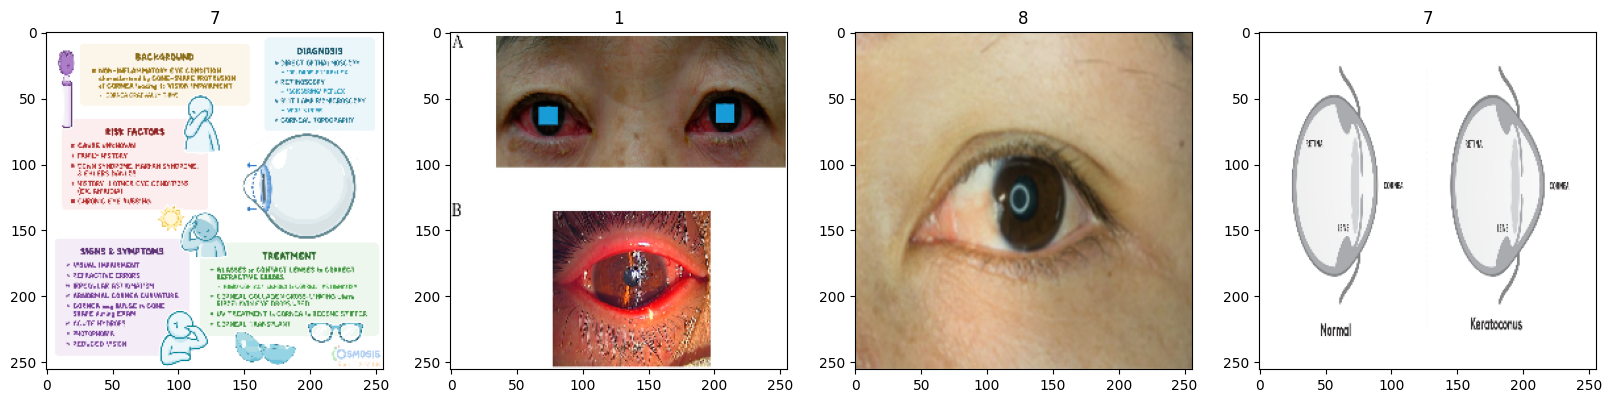

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [22]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.6666667 , 0.5882353 , 0.5372549 ],
          [0.6681687 , 0.58973736, 0.53875697],
          [0.67735904, 0.5989277 , 0.5479473 ],
          ...,
          [0.7467746 , 0.6609491 , 0.59607846],
          [0.7334318 , 0.6502749 , 0.59607846],
          [0.7354947 , 0.6518169 , 0.5933718 ]],
 
         [[0.6666667 , 0.5882353 , 0.5372549 ],
          [0.66687864, 0.5884472 , 0.5374668 ],
          [0.6816483 , 0.6032169 , 0.5522365 ],
          ...,
          [0.7334382 , 0.65027994, 0.59607846],
          [0.7481388 , 0.6620404 , 0.59607846],
          [0.7503008 , 0.63447917, 0.5766037 ]],
 
         [[0.6666667 , 0.5882353 , 0.5372549 ],
          [0.6711439 , 0.5927125 , 0.54173213],
          [0.6735536 , 0.5951222 , 0.5441418 ],
          ...,
          [0.7567188 , 0.6459176 , 0.57281876],
          [0.7311696 , 0.6481406 , 0.58796483],
          [0.7269251 , 0.64466774, 0.58603543]],
 
         ...,
 
         [[0.03921569, 0.07843138, 0.08627451],
          [0.03921

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [24]:
train_size

4

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [28]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)